In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.signal import DCFilter, Notch, Bandpass
%matplotlib inline

subject = 'Debug'
session = "session_01"


In [ ]:
def showMe(data, range=[-10000,10000]):
    plt.rcParams["figure.figsize"] = [17, 10]
    for i, channel in enumerate(data):
        offset = i*100
        plt.plot(channel+offset)
        #plt.plot(channel[range[0]:range[1]])
    plt.show()

In [2]:
path = os.path.join('data', subject, session)
files = os.listdir(path)
classes = [f.split('.')[0] for f in files]
data = {}
for file in files:
    clas = file.split('.')[0]
    data[clas]=np.load(os.path.join(path, file))


Left


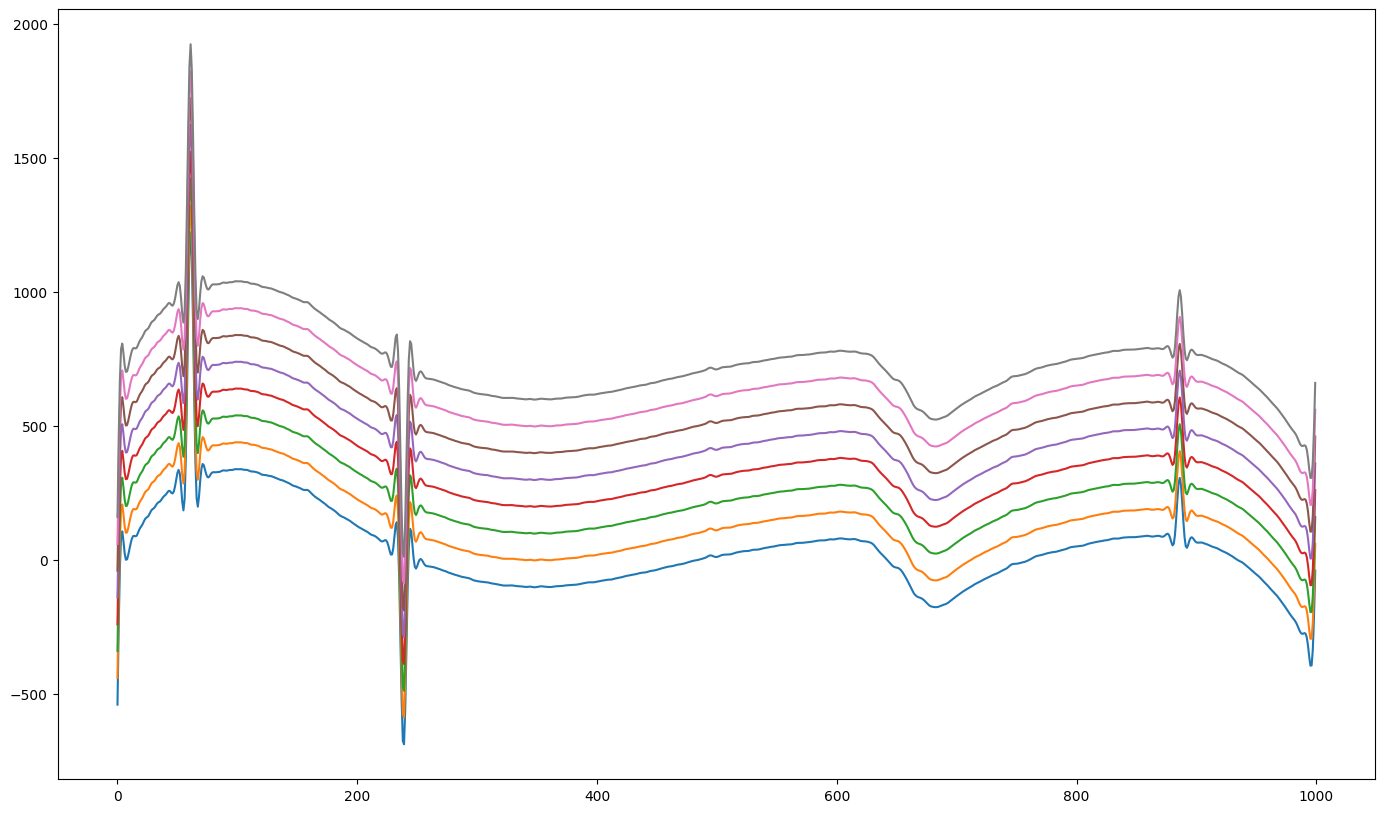

Rest


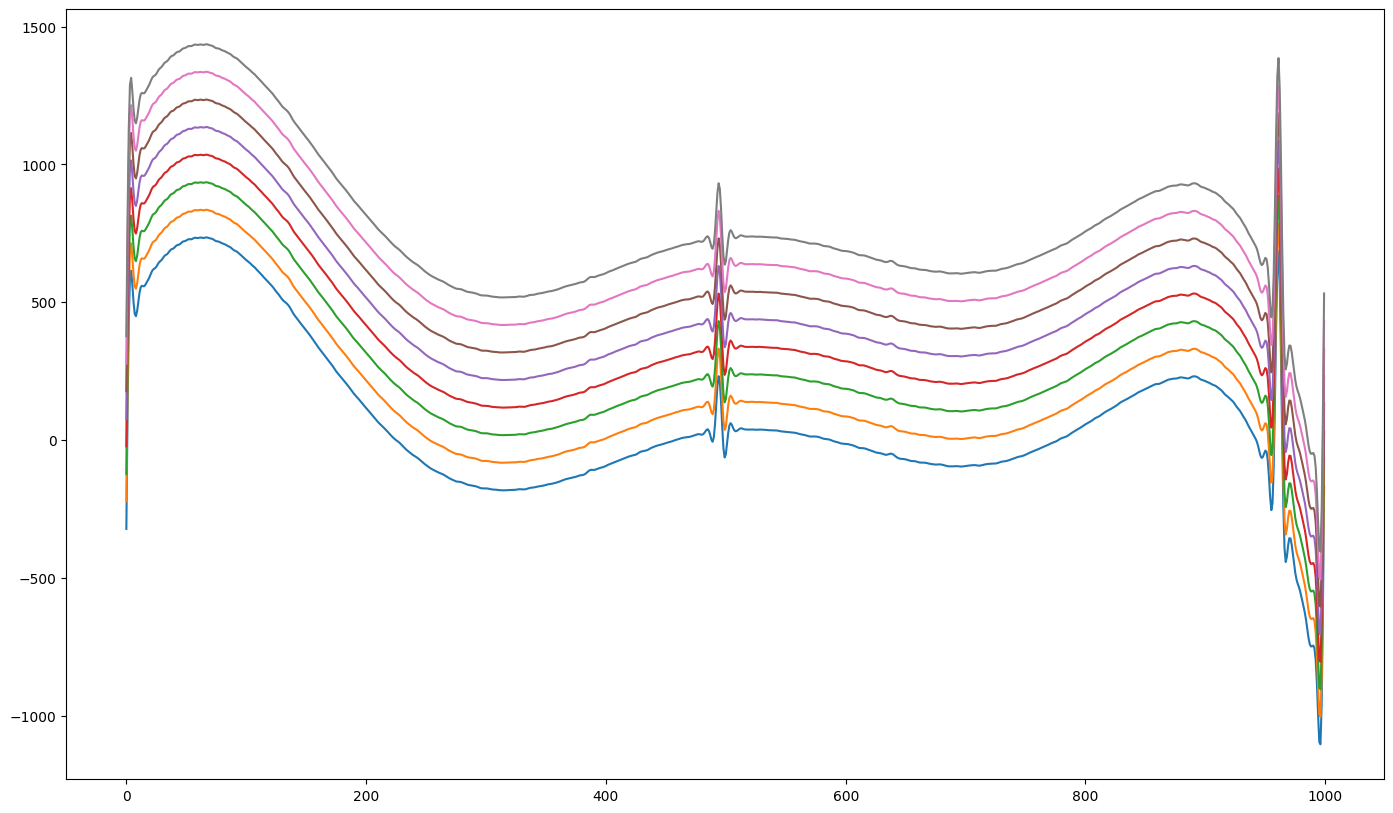

Right


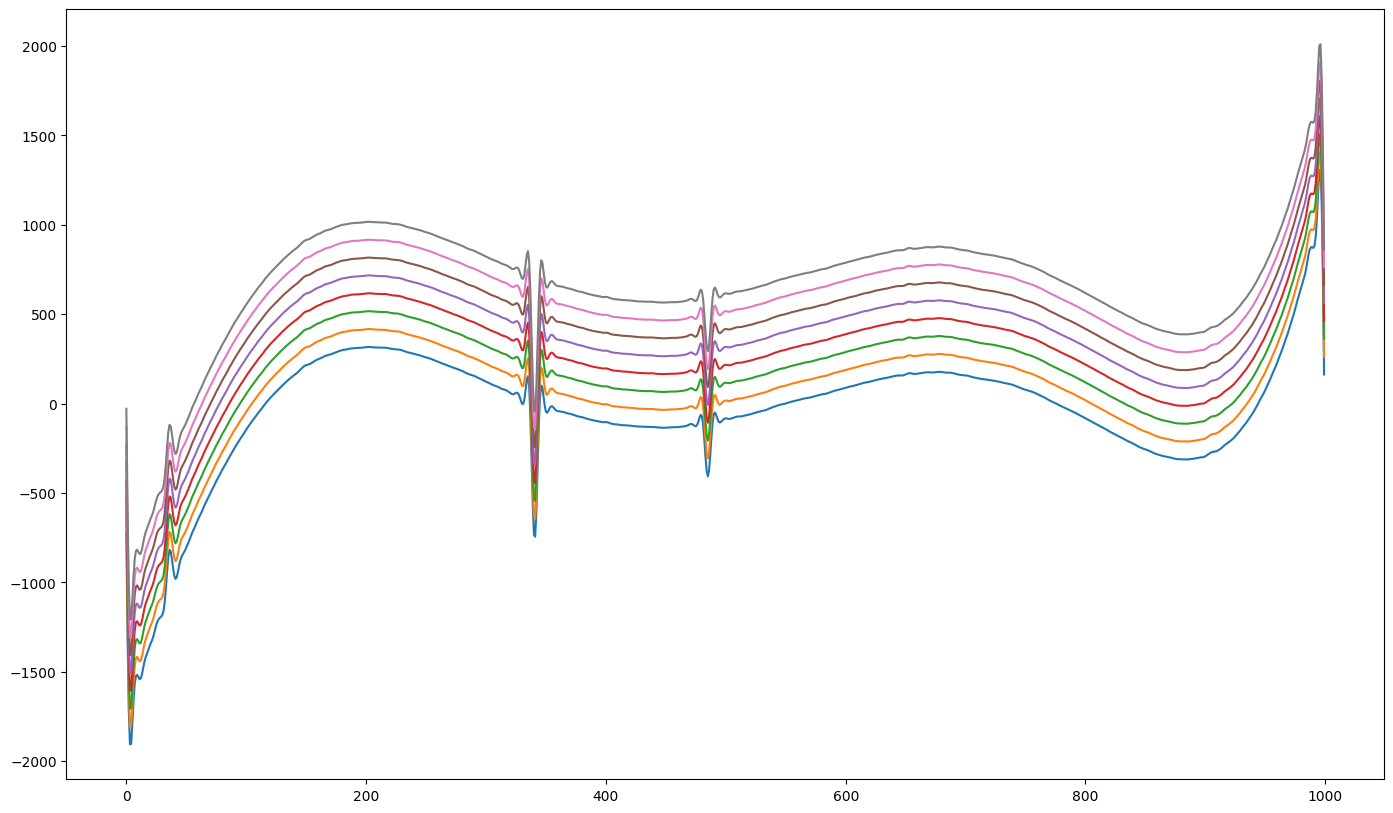

In [4]:
for c in classes:
    print(c)
    for sample in data[c]:
        #sample = DCFilter(sample)
        
        sample = Bandpass(sample)
        sample = Notch(sample)
        showMe(sample)

In [ ]:
sample = pd.read_csv('bandpass_1-60_notch50_v2.csv')
sample.head()
sample = sample.values[-500:,0:8]
sample.shape
showMe(sample.T)